In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime as dt

In [2]:
# importing the clean data set of all games since 2002 (outside of current season)
data_df = pd.read_csv(r'data\clean_data_set.csv', index_col='datetime')
#data_df.drop('Unnamed: 0', axis = 1, inplace=True)
data_df = data_df.sort_values('datetime')
data_df.head()

,team,season,opp,day_week,week,W/L,ot,record,home/away,team_score,...,team_rush_yards,team_turnover,1D_allowed,opp_total_yards,opp_pass_yards,opp_rush_yards,opp_turnover,offense_expected_points,defense_expected_points,sp_expected_points
datetime,,,,,,,,,,,,,,,,,,,,,
2002-09-05 20:38:00,NYG,2002,SFO,Thu,1,0.0,0.0,0-1,HOME,13.0,...,43.0,3.0,13.0,279.0,166.0,113.0,1.0,-4.72,-0.79,3.46
2002-09-08 13:04:00,CAR,2002,BAL,Sun,1,1.0,0.0,1-0,HOME,10.0,...,145.0,0.0,15.0,289.0,212.0,77.0,1.0,-4.38,6.68,4.20
2002-09-08 13:04:00,CHI,2002,MIN,Sun,1,1.0,0.0,1-0,HOME,27.0,...,80.0,2.0,19.0,368.0,228.0,140.0,3.0,6.37,-1.20,1.01
2002-09-08 13:04:00,CLE,2002,KAN,Sun,1,0.0,0.0,0-1,HOME,39.0,...,59.0,1.0,24.0,470.0,276.0,194.0,1.0,15.18,-17.94,1.15
2002-09-08 13:04:00,BUF,2002,NYJ,Sun,1,0.0,1.0,0-1,HOME,31.0,...,142.0,3.0,18.0,266.0,193.0,73.0,1.0,3.16,0.59,-7.81


In [3]:
# creates dictionary of form {team : current elo score}, uses old dictionary to generate since typing out 32 names is tedious.
teams = {
    'crd' : 'ARI', 'atl' : 'ATL','rav' : 'BAL','buf' : 'BUF', 
    'car' : 'CAR', 'chi' : 'CHI', 'cin' : 'CIN', 'cle' : 'CLE', 
    'dal' : 'DAL', 'den' : 'DEN', 'det' : 'DET', 'gnb' : 'GNB', 
    'htx' : 'HOU', 'clt' : 'IND', 'jax' : 'JAX', 'kan' : 'KAN', 
    'sdg' : 'LAC', 'ram' : 'LAR', 'mia' : 'MIA', 'min' : 'MIN', 
    'nwe' : 'NWE', 'nor' : 'NOR', 'nyg' : 'NYG', 'nyj' : 'NYJ', 
    'rai' : 'LVR', 'phi' : 'PHI', 'pit' : 'PIT', 'sfo' : 'SFO', 
    'sea' : 'SEA', 'tam' : 'TAM', 'oti' : 'TEN', 'was' : 'WAS'
    
}

elo_dict_all = {}
elo_dict_season = {}
elo_init_value = 1500
k = 30
for i in teams:
    elo_dict_all[teams[i]] = elo_init_value
    elo_dict_season[teams[i]] = elo_init_value


In [4]:
# ELO Functions
def elo_expected(teamA, teamB, dictionary):
    
    rating_A = dictionary[teamA]
    rating_B = dictionary[teamB]
    expected_A = 1 / (1 + 10 ** ((rating_B - rating_A) / 400 ))
    expected_B = 1 / (1 + 10 ** ((rating_A - rating_B) / 400 ))
    return [expected_A, expected_B]

def elo_update(teamA, teamB, winner, dictionary):
    elo_status = elo_expected(teamA, teamB, dictionary)
    if winner == 1:
        teamA_update = dictionary[teamA] + k * (1 - elo_status[0])
        teamB_update = dictionary[teamB] + k * (0 - elo_status[1])
    elif winner == 0:
        teamA_update = dictionary[teamA] + k * (0 - elo_status[0])
        teamB_update = dictionary[teamB] + k * (1 - elo_status[1])
    else: # this deals with tie games, just returns the original ELO score
        teamA_update = dictionary[teamA]
        teamB_update = dictionary[teamB]
    return [teamA_update, teamB_update]

In [5]:
data_df.head()

,team,season,opp,day_week,week,W/L,ot,record,home/away,team_score,...,team_rush_yards,team_turnover,1D_allowed,opp_total_yards,opp_pass_yards,opp_rush_yards,opp_turnover,offense_expected_points,defense_expected_points,sp_expected_points
datetime,,,,,,,,,,,,,,,,,,,,,
2002-09-05 20:38:00,NYG,2002,SFO,Thu,1,0.0,0.0,0-1,HOME,13.0,...,43.0,3.0,13.0,279.0,166.0,113.0,1.0,-4.72,-0.79,3.46
2002-09-08 13:04:00,CAR,2002,BAL,Sun,1,1.0,0.0,1-0,HOME,10.0,...,145.0,0.0,15.0,289.0,212.0,77.0,1.0,-4.38,6.68,4.20
2002-09-08 13:04:00,CHI,2002,MIN,Sun,1,1.0,0.0,1-0,HOME,27.0,...,80.0,2.0,19.0,368.0,228.0,140.0,3.0,6.37,-1.20,1.01
2002-09-08 13:04:00,CLE,2002,KAN,Sun,1,0.0,0.0,0-1,HOME,39.0,...,59.0,1.0,24.0,470.0,276.0,194.0,1.0,15.18,-17.94,1.15
2002-09-08 13:04:00,BUF,2002,NYJ,Sun,1,0.0,1.0,0-1,HOME,31.0,...,142.0,3.0,18.0,266.0,193.0,73.0,1.0,3.16,0.59,-7.81


In [6]:
# adds columns for ELOs before and after
k=30

team_1_elo_before = []
team_1_elo_after = []
team_2_elo_before = []
team_2_elo_after = []


for i in range(len(data_df)):
    team_1_elo_before.append(elo_dict_all[data_df['team'][i]])
    team_2_elo_before.append(elo_dict_all[data_df['opp'][i]])
    updated_elo = elo_update(data_df['team'][i], data_df['opp'][i], data_df['W/L'][i], elo_dict_all)
    team_1_elo_after.append(updated_elo[0])
    team_2_elo_after.append(updated_elo[1])
    elo_dict_all[data_df['team'][i]] = updated_elo[0]
    elo_dict_all[data_df['opp'][i]] = updated_elo[1]
    
    
data_df['team_elo_before_all'] = team_1_elo_before
data_df['team_elo_after_all'] = team_1_elo_after
data_df['opp_elo_before_all'] = team_2_elo_before
data_df['opp_elo_after_all'] = team_2_elo_after

In [7]:
data_df.tail(5)

,team,season,opp,day_week,week,W/L,ot,record,home/away,team_score,...,opp_pass_yards,opp_rush_yards,opp_turnover,offense_expected_points,defense_expected_points,sp_expected_points,team_elo_before_all,team_elo_after_all,opp_elo_before_all,opp_elo_after_all
datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-03 13:00:00,HOU,2020,TEN,Sun,17,NaN,0.0,NaN,HOME,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,1501.153293,1501.153293,1586.989587,1586.989587
2021-01-03 13:00:00,PHI,2020,WAS,Sun,17,NaN,0.0,1,HOME,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,1546.886707,1546.886707,1334.491825,1334.491825
2021-01-03 16:25:00,DEN,2020,LVR,Sun,17,NaN,0.0,NaN,HOME,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,1456.737965,1456.737965,1473.235361,1473.235361
2021-01-03 16:25:00,LAR,2020,ARI,Sun,17,NaN,0.0,NaN,HOME,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,1577.201188,1577.201188,1442.706357,1442.706357
2021-01-03 16:25:00,SFO,2020,SEA,Sun,17,NaN,0.0,NaN,HOME,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,1542.958418,1542.958418,1629.725207,1629.725207


In [8]:
k = 40

season_range = range(data_df['season'].iloc[0], data_df['season'].iloc[-1] + 1, 1)

team_1_elo_before = []
team_1_elo_after = []
team_2_elo_before = []
team_2_elo_after = []

for i in season_range:
    
    iter_df = data_df[data_df['season'] == i]
    for i in teams:
            elo_dict_season[teams[i]] = elo_init_value
    
    for x in range(len(iter_df)):
        
        team_1_elo_before.append(elo_dict_season[iter_df['team'][x]])
        team_2_elo_before.append(elo_dict_season[iter_df['opp'][x]])
        updated_elo = elo_update(data_df['team'][x], data_df['opp'][x], data_df['W/L'][x], elo_dict_season)
        team_1_elo_after.append(updated_elo[0])
        team_2_elo_after.append(updated_elo[1])
        elo_dict_season[iter_df['team'][x]] = updated_elo[0]
        elo_dict_season[iter_df['opp'][x]] = updated_elo[1]
        
data_df['team_elo_before_season'] = team_1_elo_before
data_df['team_elo_after_season'] = team_1_elo_after
data_df['opp_elo_before_season'] = team_2_elo_before
data_df['opp_elo_after_season'] = team_2_elo_after

In [9]:
data_df.tail()

,team,season,opp,day_week,week,W/L,ot,record,home/away,team_score,...,defense_expected_points,sp_expected_points,team_elo_before_all,team_elo_after_all,opp_elo_before_all,opp_elo_after_all,team_elo_before_season,team_elo_after_season,opp_elo_before_season,opp_elo_after_season
datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-03 13:00:00,HOU,2020,TEN,Sun,17,NaN,0.0,NaN,HOME,NaN,...,NaN,NaN,1501.153293,1501.153293,1586.989587,1586.989587,1416.159514,1427.111643,1457.536653,1499.009535
2021-01-03 13:00:00,PHI,2020,WAS,Sun,17,NaN,0.0,1,HOME,NaN,...,NaN,NaN,1546.886707,1546.886707,1334.491825,1334.491825,1421.083665,1455.921389,1461.881702,1458.257660
2021-01-03 16:25:00,DEN,2020,LVR,Sun,17,NaN,0.0,NaN,HOME,NaN,...,NaN,NaN,1456.737965,1456.737965,1473.235361,1473.235361,1433.186712,1411.692382,1462.775419,1418.616594
2021-01-03 16:25:00,LAR,2020,ARI,Sun,17,NaN,0.0,NaN,HOME,NaN,...,NaN,NaN,1577.201188,1577.201188,1442.706357,1442.706357,1414.885869,1450.187781,1480.992337,1445.740478
2021-01-03 16:25:00,SFO,2020,SEA,Sun,17,NaN,0.0,NaN,HOME,NaN,...,NaN,NaN,1542.958418,1542.958418,1629.725207,1629.725207,1501.051453,1473.094990,1481.076262,1478.144245


In [10]:
data_df.to_csv(r'data\elo_data_set.csv')

In [11]:
for i in elo_dict_all:
    print(i, ' : ', elo_dict_all[i])

ARI  :  1442.7063570514417
ATL  :  1487.4693301731734
BAL  :  1660.6906200530527
BUF  :  1570.396831844004
CAR  :  1412.804305489397
CHI  :  1518.7879721757276
CIN  :  1325.4713383745734
CLE  :  1399.6110750402063
DAL  :  1460.2000232000323
DEN  :  1456.737965371047
DET  :  1386.9884181738223
GNB  :  1625.1335769642794
HOU  :  1501.153293100764
IND  :  1489.920810580776
JAX  :  1324.1546025549972
KAN  :  1734.3666874227233
LAC  :  1411.784804994153
LAR  :  1577.2011882483803
MIA  :  1472.2690123795592
MIN  :  1550.3698992993438
NWE  :  1610.526698729991
NOR  :  1672.8184467875833
NYG  :  1332.4682577439341
NYJ  :  1320.6252593009788
LVR  :  1473.235361193447
PHI  :  1546.886706887085
PIT  :  1650.189660925312
SFO  :  1542.9584180418938
SEA  :  1629.725206860574
TAM  :  1490.8664591573813
TEN  :  1586.9895873402693
WAS  :  1334.4918245400963


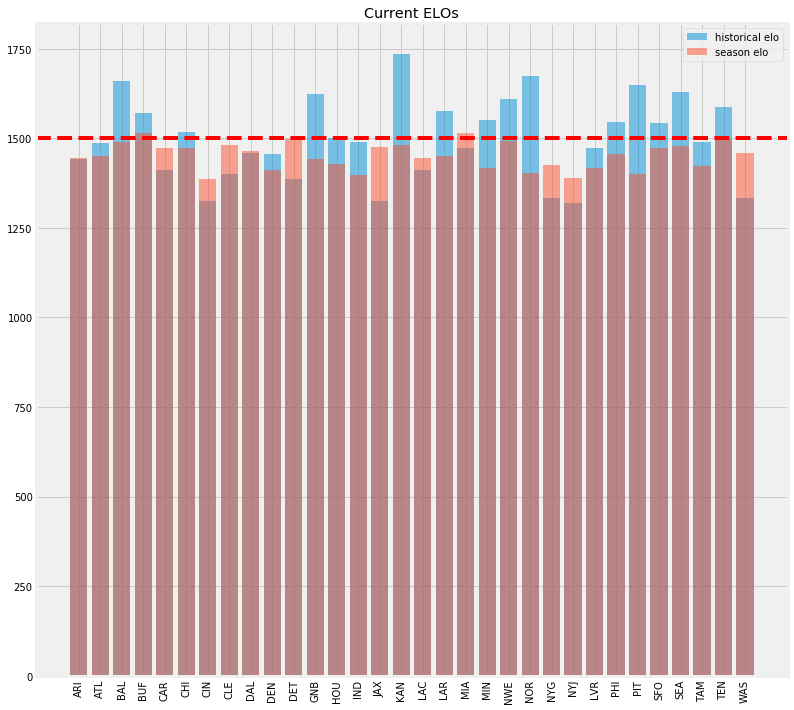

In [12]:
fig = plt.figure(figsize = (12,12))
plt.bar(elo_dict_all.keys(), elo_dict_all.values(), alpha=0.5, label='historical elo')
plt.bar(elo_dict_season.keys(), elo_dict_season.values(), alpha=0.5, label='season elo')
plt.xticks(rotation=90)
plt.title('Current ELOs')
plt.axhline(1500, color='r', linestyle='--')
plt.legend()

plt.savefig('current_elos_all.png')
plt.show()